In [1]:
import pandas as pd
import numpy as np
df_all = pd.read_csv("data/train_2.csv")

In [2]:
df_all = df_all.fillna(0)

In [3]:
df_all.columns[:-30]

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2017-08-02', '2017-08-03', '2017-08-04', '2017-08-05', '2017-08-06',
       '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10', '2017-08-11'],
      dtype='object', length=774)

In [4]:
df = df_all.iloc[:,:-30]
df_test = df_all.iloc[:,-30:]
df_test['Page'] = df['Page']
print(df.columns,'\n',df_test.columns)

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2017-08-02', '2017-08-03', '2017-08-04', '2017-08-05', '2017-08-06',
       '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10', '2017-08-11'],
      dtype='object', length=774) 
 Index(['2017-08-12', '2017-08-13', '2017-08-14', '2017-08-15', '2017-08-16',
       '2017-08-17', '2017-08-18', '2017-08-19', '2017-08-20', '2017-08-21',
       '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25', '2017-08-26',
       '2017-08-27', '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31',
       '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04', '2017-09-05',
       '2017-09-06', '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10',
       'Page'],
      dtype='object')


In [5]:
def find_language(url):
    res = re.search('[a-z][a-z].wikipedia.org',url)
    if res:
        return res[0][0:2]
    return 'na'

In [6]:
import re
df['Language'] = df['Page'].apply(find_language)
df.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,Language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,zh
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,35.0,18.0,18.0,15.0,16.0,13.0,14.0,29.0,18.0,zh
6,91Days_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,8.0,7.0,5.0,12.0,7.0,9.0,11.0,8.0,zh
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,33.0,20.0,53.0,21.0,94.0,34.0,46.0,94.0,15.0,zh
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,42.0,33.0,32.0,29.0,16.0,41.0,40.0,74.0,34.0,zh
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,35.0,12.0,13.0,19.0,21.0,23.0,61.0,32.0,26.0,zh


In [7]:
from collections import Counter
language_page_counts = Counter(list(df['Language']))

In [8]:
language_page_counts

Counter({'zh': 17229,
         'fr': 17802,
         'en': 24108,
         'na': 17855,
         'ru': 15022,
         'de': 18547,
         'ja': 20431,
         'es': 14069})

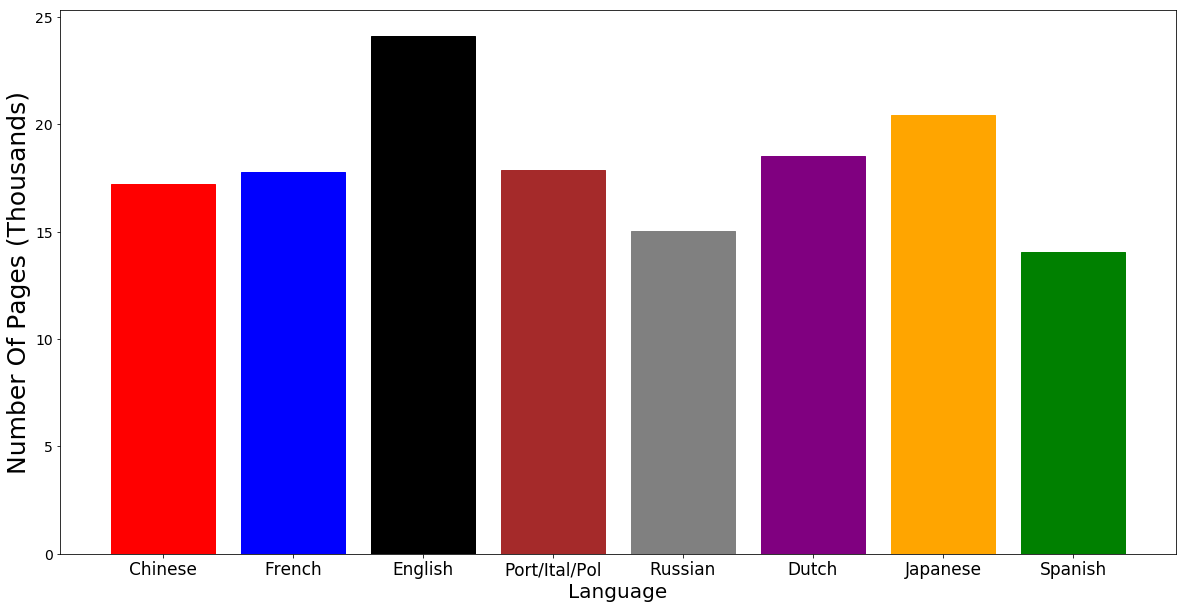

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
barlist = plt.bar(['Chinese','French','English','Port/Ital/Pol','Russian','Dutch','Japanese','Spanish'], [language_page_counts[lang]/1e3 for lang in list(language_page_counts.keys())])
lang_colors = ['red','blue','black','brown','grey','purple','orange','green']
for num,color in enumerate(lang_colors):
    barlist[num].set_color(color)
#plt.title('Number of Pages per Language')
plt.xlabel("Language",fontsize=20)
plt.xticks(fontsize=17)
plt.ylabel("Number Of Pages (Thousands)",fontsize=25)
plt.yticks(fontsize=14)
plt.show()

## Create Dataframe for each language

In [12]:
df_zh = df[df['Language']=='zh']
df_fr = df[df['Language']=='fr']
df_en = df[df['Language']=='en']
df_ru = df[df['Language']=='ru']
df_de = df[df['Language']=='de']
df_ja = df[df['Language']=='ja']
df_es = df[df['Language']=='es']
df_na = df[df['Language']=='na']

### Top Pages Per Country

In [13]:
from collections import Counter

d = Counter(dict(zip(list(df_en['Page']),df_en.drop(['Page','Language'],axis=1).sum(axis=1))))

d.most_common(150)

[('Main_Page_en.wikipedia.org_all-access_all-agents', 16703345081.0),
 ('Main_Page_en.wikipedia.org_desktop_all-agents', 12486993828.0),
 ('Main_Page_en.wikipedia.org_mobile-web_all-agents', 3782103024.0),
 ('Special:Search_en.wikipedia.org_all-access_all-agents', 1835991904.0),
 ('Special:Search_en.wikipedia.org_desktop_all-agents', 1363523801.0),
 ('Special:Search_en.wikipedia.org_mobile-web_all-agents', 472338024.0),
 ('Special:Book_en.wikipedia.org_all-access_all-agents', 210964979.0),
 ('Special:Book_en.wikipedia.org_desktop_all-agents', 210069877.0),
 ('Special:Search_en.wikipedia.org_all-access_spider', 181280648.0),
 ('Main_Page_en.wikipedia.org_all-access_spider', 165434726.0),
 ('404.php_en.wikipedia.org_all-access_all-agents', 157780302.0),
 ('404.php_en.wikipedia.org_desktop_all-agents', 157776840.0),
 ('XHamster_en.wikipedia.org_all-access_all-agents', 116867538.0),
 ('Donald_Trump_en.wikipedia.org_all-access_all-agents', 114508319.0),
 ('XHamster_en.wikipedia.org_mobile-w

### Sum across the various pages

In [14]:
data_zh = df_zh.drop(['Page','Language'],axis=1).sum(axis=0)
data_fr = df_fr.drop(['Page','Language'],axis=1).sum(axis=0)
data_en = df_en.drop(['Page','Language'],axis=1).sum(axis=0)
data_ru = df_ru.drop(['Page','Language'],axis=1).sum(axis=0)
data_de = df_de.drop(['Page','Language'],axis=1).sum(axis=0)
data_ja = df_ja.drop(['Page','Language'],axis=1).sum(axis=0)
data_es = df_es.drop(['Page','Language'],axis=1).sum(axis=0)
data_na = df_na.drop(['Page','Language'],axis=1).sum(axis=0)

In [ ]:
#df_en.to_csv("data/df_en.csv")

In [ ]:
#df_en

In [15]:
import datetime
dates = pd.to_datetime(data_zh.index)

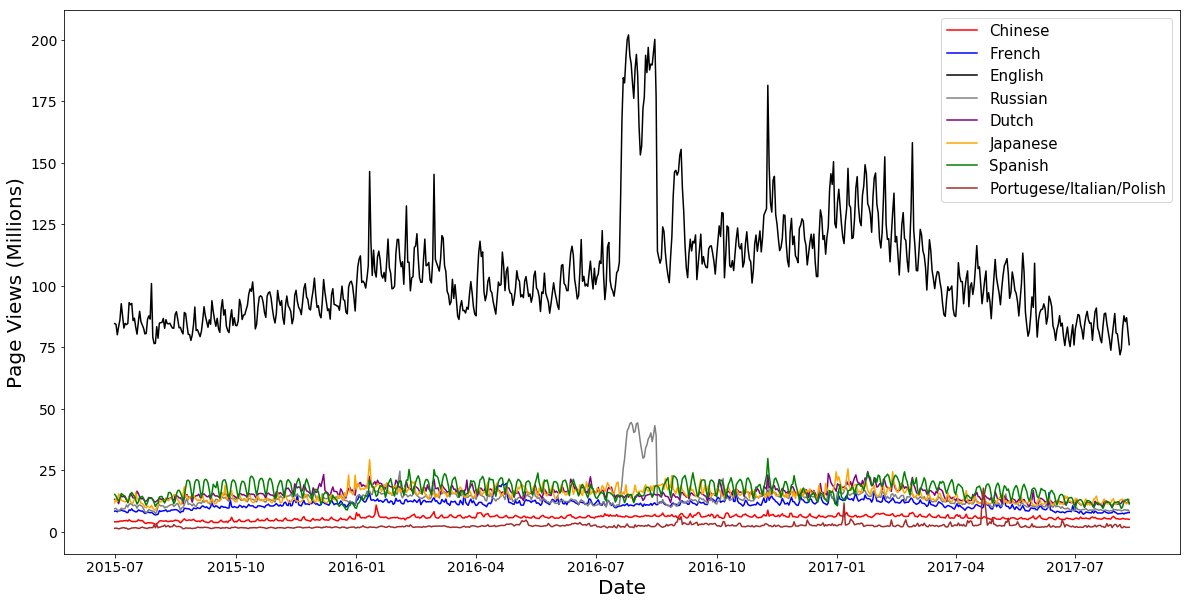

In [16]:
plt.figure(figsize=(20,10))


plt.plot(dates,data_zh.values/1e6, color='red', label='Chinese')
plt.plot(dates,data_fr.values/1e6, color='blue', label='French')
plt.plot(dates,data_en.values/1e6, color='black', label='English')
plt.plot(dates,data_ru.values/1e6, color='grey', label='Russian')
plt.plot(dates,data_de.values/1e6, color='purple', label='Dutch')
plt.plot(dates,data_ja.values/1e6, color='orange', label='Japanese')
plt.plot(dates,data_es.values/1e6, color='green', label='Spanish')
plt.plot(dates,data_na.values/1e6, color='brown', label='Portugese/Italian/Polish')

#plt.title('Total Wikipedia Page Views Per Language',fontsize=30)
plt.xlabel("Date",fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel("Page Views (Millions)",fontsize=20)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.show()

### Manually Searching For Anomoly

In [19]:
print((df_en.iloc[:,360:430].fillna(0).sum(axis=1)).reset_index(drop=True).idxmax())
find_anom = df_en.reset_index(drop=True).iloc[11273,360:430]
plt.plot(range(len(find_anom)),list(find_anom))
plt.show()

## Auto-Correlations

In [21]:
langs = ['Chinese','French','English','Russian','Dutch','Japanese','Spanish','Port/Ital/Pol']

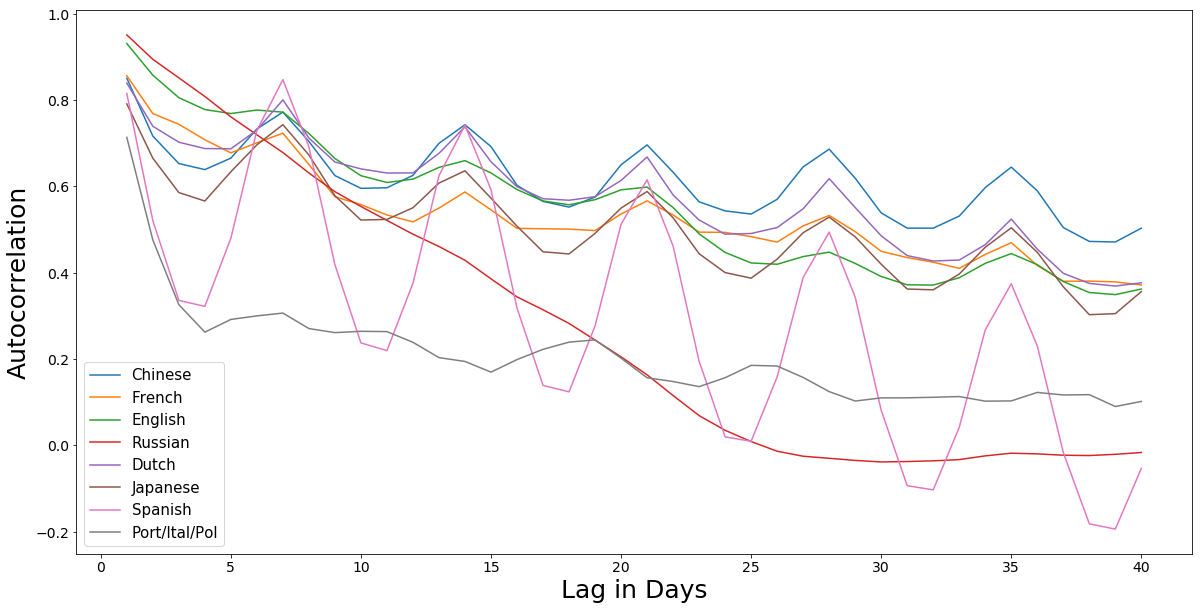

In [26]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
import numpy as np

fig = plt.figure(figsize=(20,10))
lang_index = 0
#lang_colors = ['red','blue','black','brown','grey','purple','orange','green']
for data_lang in [data_zh, data_fr, data_en, data_ru, data_de, data_ja, data_es, data_na]:

    #data = np.array(data_zh)
    autocorr = acf(data_lang)
    
    x = [x for x in range(len(autocorr))]
    
    plt.plot(x[1:],autocorr[1:],label=langs[lang_index])
    lang_index += 1    

plt.xlabel('Lag in Days',fontsize=25)
plt.xticks(fontsize=14)
plt.ylabel('Autocorrelation',fontsize=25)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})
plt.show()

### Functions For Data Preparatoin

In [27]:
langs = ["zh", "fr", "en", "ru", "de", "ja", "es", "na"]

lang = 'zh'

def vect_lang(lang,langs):
    return ([1 if la is lang else 0 for la in langs])

vect_lang(lang,langs)

[1, 0, 0, 0, 0, 0, 0, 0]

In [32]:
import numpy as np

def prepare_data(data_lang,window_size,lang_index):
 
    #Make the zero padding better
    langs = ["zh", "fr", "en", "ru", "de", "ja", "es", "na"]
    
    data_lang = [0]*24 + list(data_lang)
    
    #Make sure divisible nicely by window_size
    #Only works if perfectly divisible right now
    X = []
    y = []
    
    i = 0
    j = window_size
    
    for train_sample in range(int(len(data_lang) - window_size)):
        X.append(data_lang[i:j])
        i += 1
        j += 1

    y = data_lang[window_size:]
    
    #Normalize The Data Here
    aux = vect_lang(langs[lang_index],langs)
    aux = [aux]*len(y)
    #Create the vector for language 
    
    return X, y, aux

## Build The LSTM

In [33]:
def flatten_all_data(dfs):
    flattened = []
    for df in dfs:
        flattened.append(df.values.flatten())
    return np.array(flattened).flatten()

flatten_all_data([data_zh, data_fr, data_en, data_ru, data_de, data_ja, data_es, data_na])

from pandas import Series
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(np.array(flatten_all_data([data_zh, data_fr, data_en, data_ru, data_de, data_ja, data_es, data_na])).reshape(-1,1))

print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))


Min: 1173012.000000, Max: 202062970.000000


In [34]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


[]

In [35]:
# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, concatenate
from keras.layers import Activation
from keras.layers import Input
from keras.models import Model


from keras.callbacks import EarlyStopping

def objective(params):
  
    lstm_units = int(params[0])
    nn1_units = int(params[1])
    nn2_units = int(params[2])
  
  # Initializing the RNN
    window_size = 30

    main_input = Input(shape=(window_size,1), dtype='float32', name='main_input')

    lstm_out = LSTM(units = lstm_units, activation = 'relu')(main_input)

    auxiliary_output = Dense(1, activation='relu', name='aux_output')(lstm_out)

    auxiliary_input = Input(shape=(8,), name='aux_input')
    model = concatenate([lstm_out, auxiliary_input])
    model = Dense(units = nn1_units, activation='relu')(model)
    #model = Dropout(0.1)(model)
    model = Dense(units = nn2_units, activation='relu')(model)
    main_output = Dense(1, activation='linear', name='main_output')(model)

    model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])
    model.compile(optimizer = 'adam', loss = 'mean_absolute_error',loss_weights=[1., 0.2])

    callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='min')]

    for _ in range(0,2):

        lang_index = 0

        for data_lang in [data_en, data_ru, data_de, data_ja, data_es, data_na]:

          #data_lang = scaler.transform(np.array(data_lang).reshape(-1,1)) #scaling


            X, y, aux = prepare_data(data_lang, window_size, lang_index)
            lang_index += 1

            #Train Validate Split
            length = len(y)

            X_fit = X[:int(length/1.25)]
            y_fit = y[:int(length/1.25)]
            aux_fit = aux[:int(length/1.25)]
 
            X_val = X[int(length/1.25)+1:]
            y_val = y[int(length/1.25)+1:]
            aux_val = aux[int(length/1.25)+1:]

            X_fit = np.array(X_fit).reshape(len(y_fit), window_size, 1)
            X_val = np.array(X_val).reshape(len(y_val), window_size, 1)

            aux_fit = np.array(aux_fit).reshape(len(y_fit), 8)
            aux_val = np.array(aux_val).reshape(len(y_val), 8)

            #May have to reshape aux 

            model.reset_states()

            model.fit([X_fit, aux_fit], [y_fit, y_fit], epochs=10, batch_size=50, verbose=1, validation_data=([X_val, aux_val], [y_val, y_val]), callbacks=callbacks )
          
  
  #Try get the objective function to output mae using the all the train+val examples
    ae_scores = []
  
    lang_index = 0
  
    for data_lang in [data_en, data_ru, data_de, data_ja, data_es, data_na]:
    
      X_true, y_true, aux_true = prepare_data(data_lang, window_size, lang_index)
    
      lang_index += 1
    
      for num in range(len(y_true)):
      
        y_pred = model.predict([np.array(X_true[num]).reshape(1,window_size,1), np.array(aux[num]).reshape(1,8)])
        ae_scores.append(abs(y_pred[0][0]-y_true[num]))

  
  
    return sum([s[0] for s in ae_scores])/len(ae_scores)
  

In [37]:
%%time
objective([128,2,2])

Train on 613 samples, validate on 153 samples
Epoch 1/10
613/613 [==============================] - 1s 2ms/step - loss: 124732723.9413 - main_output_loss: 109168519.8173 - aux_output_loss: 77821018.1077 - val_loss: 98956944.1569 - val_main_output_loss: 91977326.7451 - val_aux_output_loss: 34898085.6732
Epoch 2/10
613/613 [==============================] - 0s 705us/step - loss: 116811995.4584 - main_output_loss: 109168514.4144 - aux_output_loss: 38217403.9021 - val_loss: 98526641.5686 - val_main_output_loss: 91977326.7451 - val_aux_output_loss: 32746583.6601
Epoch 3/10
613/613 [==============================] - 0s 691us/step - loss: 117023323.6411 - main_output_loss: 109168518.3687 - aux_output_loss: 39274033.3116 - val_loss: 97384031.0065 - val_main_output_loss: 91977326.7451 - val_aux_output_loss: 27033518.5850
Epoch 4/10
613/613 [==============================] - 0s 724us/step - loss: 115374030.5383 - main_output_loss: 109168519.4258 - aux_output_loss: 31027556.0522 - val_loss: 96522

613/613 [==============================] - 0s 760us/step - loss: 16437779.1746 - main_output_loss: 15810265.7455 - aux_output_loss: 3137568.3495 - val_loss: 13299845.8039 - val_main_output_loss: 12561392.5425 - val_aux_output_loss: 3692265.3268
Epoch 4/10
613/613 [==============================] - 0s 782us/step - loss: 16636193.3181 - main_output_loss: 15810266.2284 - aux_output_loss: 4129635.6607 - val_loss: 13122905.1765 - val_main_output_loss: 12561392.5425 - val_aux_output_loss: 2807562.7737
Epoch 5/10
613/613 [==============================] - 0s 809us/step - loss: 16538293.1321 - main_output_loss: 15810265.9315 - aux_output_loss: 3640135.0106 - val_loss: 13142932.8366 - val_main_output_loss: 12561392.5425 - val_aux_output_loss: 2907701.1781
Epoch 6/10
613/613 [==============================] - 0s 815us/step - loss: 16460034.3263 - main_output_loss: 15810266.0995 - aux_output_loss: 3248840.5693 - val_loss: 12927383.3007 - val_main_output_loss: 12561392.5425 - val_aux_output_loss: 

613/613 [==============================] - 0s 742us/step - loss: 113258763.6281 - main_output_loss: 109168517.4290 - aux_output_loss: 20451233.3736 - val_loss: 95179834.0915 - val_main_output_loss: 91977326.7451 - val_aux_output_loss: 16012534.8693
Epoch 9/10
613/613 [==============================] - 1s 819us/step - loss: 113152392.2349 - main_output_loss: 109168518.0946 - aux_output_loss: 19919366.1697 - val_loss: 93535191.8954 - val_main_output_loss: 91977326.7451 - val_aux_output_loss: 7789325.5278
Epoch 10/10
613/613 [==============================] - 1s 819us/step - loss: 114672488.4307 - main_output_loss: 109168519.8564 - aux_output_loss: 27519840.6591 - val_loss: 94753106.9281 - val_main_output_loss: 91977326.7451 - val_aux_output_loss: 13878899.5294
Train on 613 samples, validate on 153 samples
Epoch 1/10
613/613 [==============================] - 1s 829us/step - loss: 15906878.8091 - main_output_loss: 14642569.1272 - aux_output_loss: 6321548.5922 - val_loss: 12700919.8039 - v

613/613 [==============================] - 1s 892us/step - loss: 18517148.9902 - main_output_loss: 17505466.0522 - aux_output_loss: 5058414.0285 - val_loss: 15462781.7320 - val_main_output_loss: 15042206.0719 - val_aux_output_loss: 2102878.4567
Epoch 4/10
613/613 [==============================] - 1s 835us/step - loss: 18194980.6721 - main_output_loss: 17505465.6868 - aux_output_loss: 3447576.0277 - val_loss: 15952756.1699 - val_main_output_loss: 15042206.0719 - val_aux_output_loss: 4552750.3734
Epoch 5/10
613/613 [==============================] - 1s 892us/step - loss: 18332308.0294 - main_output_loss: 17505465.7520 - aux_output_loss: 4134211.3858 - val_loss: 15647663.7843 - val_main_output_loss: 15042206.0719 - val_aux_output_loss: 3027291.0327
Epoch 6/10
613/613 [==============================] - 1s 881us/step - loss: 20701148.4992 - main_output_loss: 17505465.2724 - aux_output_loss: 15978415.2333 - val_loss: 18050647.6863 - val_main_output_loss: 15042206.0719 - val_aux_output_loss:

28334031.338466972

In [ ]:
from skopt import gp_minimize

space = [(10,64),(2,10),(2,10)]

#r = gp_minimize(objective, space, n_calls=30, random_state=0,n_jobs=-1,verbose=True)

In [ ]:
#best_params = r.x
#print(best_params)
#print(r.fun)

In [38]:
best_params = [53,7,6]

In [39]:
from skopt.plots import plot_convergence

#plot_convergence(r);

## Bayesian Optimization Minimum = LSTM 53, FNN 7, FNN 6

![convergence_plot.png](convergence_plot.png)

In [51]:
%%time
#Final Model

lstm_units = int(best_params[0])
nn1_units = int(best_params[1])
nn2_units = int(best_params[2])

# Initializing the RNN
window_size = 30

main_input = Input(shape=(window_size,1), dtype='float32', name='main_input')

lstm_out = LSTM(units = lstm_units, activation = 'relu')(main_input)

auxiliary_output = Dense(1, activation='relu', name='aux_output')(lstm_out)

auxiliary_input = Input(shape=(8,), name='aux_input')
model = concatenate([lstm_out, auxiliary_input])
model = Dense(units = nn1_units, activation='relu')(model)
#model = Dropout(0.1)(model)
model = Dense(units = nn2_units, activation='relu')(model)
main_output = Dense(1, activation='linear', name='main_output')(model)

model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])
model.compile(optimizer = 'adam', loss = 'mean_absolute_error',loss_weights=[1., 0.2])

callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='min')]

for _ in range(0,2):

    lang_index = 0

    for data_lang in [data_en, data_ru, data_de, data_ja, data_es, data_na]:

        #data_lang = scaler.transform(np.array(data_lang).reshape(-1,1)) #scaling


        X, y, aux = prepare_data(data_lang, window_size, lang_index)
        lang_index += 1

        #Train Validate Split
        length = len(y)

        X_fit = X[:int(length/1.25)]
        y_fit = y[:int(length/1.25)]
        aux_fit = aux[:int(length/1.25)]

        X_val = X[int(length/1.25)+1:]
        y_val = y[int(length/1.25)+1:]
        aux_val = aux[int(length/1.25)+1:]

        X_fit = np.array(X_fit).reshape(len(y_fit), window_size, 1)
        X_val = np.array(X_val).reshape(len(y_val), window_size, 1)

        aux_fit = np.array(aux_fit).reshape(len(y_fit), 8)
        aux_val = np.array(aux_val).reshape(len(y_val), 8)

        #May have to reshape aux 

        model.reset_states()

        model.fit([X_fit, aux_fit], [y_fit, y_fit], epochs=5, batch_size=50, verbose=1, validation_data=([X_val, aux_val], [y_val, y_val]), callbacks=callbacks )


Train on 613 samples, validate on 153 samples
Epoch 1/5
613/613 [==============================] - 2s 3ms/step - loss: 75822681.8923 - main_output_loss: 55681892.6656 - aux_output_loss: 100703940.0196 - val_loss: 56107288.3660 - val_main_output_loss: 37962498.6405 - val_aux_output_loss: 90723947.3987
Epoch 2/5
613/613 [==============================] - 0s 676us/step - loss: 88793859.0277 - main_output_loss: 67302910.1077 - aux_output_loss: 107454739.7194 - val_loss: 79670389.9085 - val_main_output_loss: 62307823.9216 - val_aux_output_loss: 86812837.8562
Epoch 3/5
613/613 [==============================] - 0s 689us/step - loss: 98289413.2985 - main_output_loss: 79080199.1256 - aux_output_loss: 96046067.7716 - val_loss: 72801315.6863 - val_main_output_loss: 56984170.6144 - val_aux_output_loss: 79085724.1307
Epoch 4/5
613/613 [==============================] - 0s 707us/step - loss: 72196940.5024 - main_output_loss: 56637246.0424 - aux_output_loss: 77798469.1941 - val_loss: 51649656.7843 -

613/613 [==============================] - 1s 831us/step - loss: 15296561.3703 - main_output_loss: 12085090.1093 - aux_output_loss: 16057355.9184 - val_loss: 12658017.7190 - val_main_output_loss: 10193148.9346 - val_aux_output_loss: 12324342.7386
Epoch 3/5
613/613 [==============================] - 1s 817us/step - loss: 15250161.0196 - main_output_loss: 12269187.7798 - aux_output_loss: 14904864.8940 - val_loss: 8582594.7255 - val_main_output_loss: 7294104.2647 - val_aux_output_loss: 6442451.4869
Epoch 4/5
613/613 [==============================] - 1s 884us/step - loss: 13983672.0326 - main_output_loss: 11575059.7243 - aux_output_loss: 12043061.2561 - val_loss: 6480581.5948 - val_main_output_loss: 5212018.8088 - val_aux_output_loss: 6342813.6748
Epoch 5/5
613/613 [==============================] - 1s 913us/step - loss: 11808151.9788 - main_output_loss: 9689766.3605 - aux_output_loss: 10591927.7243 - val_loss: 8145252.1536 - val_main_output_loss: 6550069.9036 - val_aux_output_loss: 79759

In [55]:
from keras.models import load_model

#model.save('lstm53_d7_d6.h5')  # creates a HDF5 file 'my_model.h5'
model.load_weights('lstm53_d7_d6.h5')

In [56]:
def forecast_future(data_lang,forecast_days,window_size,lang):
    #print("Forecasting for ", page)
    
    langs = ["zh", "fr", "en", "ru", "de", "ja", "es", "na"]
    
    X_input = list(data_lang[-window_size:])
    
    aux = vect_lang(lang,langs)

    #print(X_input)
    all_predicted = []
    for _ in range(forecast_days):
        
        pred_views  = model.predict([np.array(X_input).reshape(1,window_size,1), np.array(aux).reshape(1,8)])
        all_predicted.append(pred_views[0][0])
        X_input = np.delete(X_input,0)
        X_input = np.append(X_input,pred_views[0][0])
    
    return([x[0] for x in all_predicted])
    
#return scaler.inverse_transform(all_predicted)

In [57]:
predicted_zh = forecast_future(data_zh,30,window_size, 'zh')
predicted_fr = forecast_future(data_fr,30,window_size, 'fr')
predicted_en = forecast_future(data_en,30,window_size, 'en')
predicted_ru = forecast_future(data_ru,30,window_size, 'ru')
predicted_de = forecast_future(data_de,30,window_size, 'de')
predicted_ja = forecast_future(data_ja,30,window_size, 'ja')
predicted_es = forecast_future(data_es,30,window_size, 'es')
predicted_na = forecast_future(data_na,30,window_size, 'na')

## Appending Predicted Page Views
Quick graph

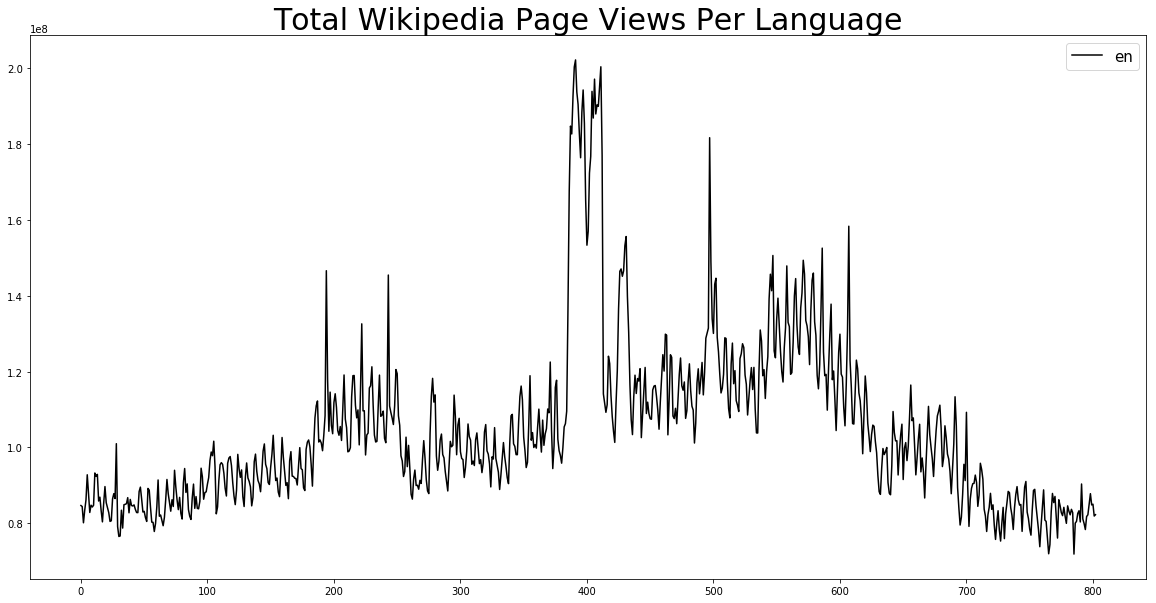

In [58]:
plt.figure(figsize=(20,10))

data_en_total = list(data_en.values) + list(predicted_en)
plt.plot(range(len(data_en_total)),data_en_total, color='black', label='en')

plt.title('Total Wikipedia Page Views Per Language',fontsize=30)
plt.legend(prop={'size': 15})
plt.show()

In [46]:
df_test['Language'] = df_test['Page'].apply(find_language)


df_test_zh = df_test[df_test['Language']=='zh']
df_test_fr = df_test[df_test['Language']=='fr']
df_test_en = df_test[df_test['Language']=='en']
df_test_ru = df_test[df_test['Language']=='ru']
df_test_de = df_test[df_test['Language']=='de']
df_test_ja = df_test[df_test['Language']=='ja']
df_test_es = df_test[df_test['Language']=='es']
df_test_na = df_test[df_test['Language']=='na']

In [47]:
import matplotlib.pyplot as plt

data_test_zh = df_test_zh.drop(['Page','Language'],axis=1).sum(axis=0)
data_test_fr = df_test_fr.drop(['Page','Language'],axis=1).sum(axis=0)
data_test_en = df_test_en.drop(['Page','Language'],axis=1).sum(axis=0)
data_test_ru = df_test_ru.drop(['Page','Language'],axis=1).sum(axis=0)
data_test_de = df_test_de.drop(['Page','Language'],axis=1).sum(axis=0)
data_test_ja = df_test_ja.drop(['Page','Language'],axis=1).sum(axis=0)
data_test_es = df_test_es.drop(['Page','Language'],axis=1).sum(axis=0)
data_test_na = df_test_na.drop(['Page','Language'],axis=1).sum(axis=0)

In [48]:
len(data_test_en.values)

30

In [49]:
data_test = pd.DataFrame([data_test_zh,data_test_fr,data_test_en,data_test_ru,data_test_de,data_test_ja,data_test_es,data_test_na ],index=["zh", "fr", "en", "ru", "de", "ja", "es", "na"],columns=df_test_zh.columns[0:-2])

In [ ]:
#data_test.T.to_csv("test_data.csv")

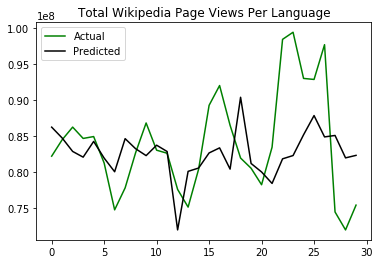

In [59]:
plt.plot(range(len(data_test_en.values)),data_test_en.values, color='green', label='Actual')
plt.plot(range(len(data_test_en.values)),predicted_en, color='black', label='Predicted')

plt.title('Total Wikipedia Page Views Per Language',fontsize=12)
plt.legend(prop={'size': 10})
plt.show()

In [60]:
predictions = pd.DataFrame([predicted_zh,predicted_fr,predicted_en,predicted_ru,predicted_de,predicted_ja,predicted_es,predicted_na ],index=["zh", "fr", "en", "ru", "de", "ja", "es", "na"],columns=df_test_zh.columns[0:-2])

In [ ]:
#predictions.to_csv('/predictions.csv')